In [2]:

# coding: utf-8

# In[346]:


from array import array
import sys
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import math
import csv
import pandas

In [3]:
def Square_difference_Cost_Function(Y_predict,Y_true):

    CostFunction = np.sum((Y_predict-Y_true)**2)
    return CostFunction

In [4]:

class Hamiltonians(object):
    
    def __init__(self):
        m = 1

    def SHO_Hamiltonian(self,Phase_Space_time_samples):
#         m = 1
#         k = 1
#         x = Phase_Space_time_samples[1,:]
#         p = Phase_Space_time_samples[2,:]   

#         Hamiltonian_Samples = (p**2)/(2*m) + (x**2)*k/2
        
        m = 1
        GM = 2
        l = 1.3
#         Number_Of_Samples = len(Phase_Space_time_samples[1,:])
        x = Phase_Space_time_samples[1,:]
        p = Phase_Space_time_samples[2,:]    

        Hamiltonian_Samples = (p**2)/(2*m) + (l**2)/(2*m*(x**2)) - GM*m/x
        
        return         Hamiltonian_Samples
    
    
def Calculate_Hamiltonian_for_1D_SHO_(Phase_Space_time_samples):
    Hamiltonian_for_1D_SHO_ = Hamiltonian_for_1D_SHO(Phase_Space_time_samples)
    return Hamiltonian_for_1D_SHO_



Phase_Space_time_samples = np.random.rand(4,3)
H = Hamiltonians()
print(H.SHO_Hamiltonian(Phase_Space_time_samples))

[ 6.51592168 -0.94594744  0.5781489 ]


In [5]:
def Create_true_path(First_two_phase_space_samples,T_total):

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]


    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])



    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dp_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    p_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    p_true[0] = Initial_conditions[1]
    
    H = Hamiltonians()
    dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        p_true[i] = p_true[i-1] + dp_true[i-1]
        dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)

    return q_true, p_true, dq_true, dp_true

In [6]:
def Create_True_Hamiltonian_paths(H,Curent_state,dt,dq,dp,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])
    Sample3 = np.array([t[i],Curent_state[0] ,Curent_state[1] - dp/2])               
    Sample4 = np.array([t[i],Curent_state[0] ,Curent_state[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = H.SHO_Hamiltonian(Phase_Space_time_samples)

    dp_true  = -(Hamiltonian_Samples[1] - Hamiltonian_Samples[0])*dt/dq
    dq_true  = (Hamiltonian_Samples[3] - Hamiltonian_Samples[2])*dt/dp
    
    return dq_true, dp_true    
    


In [7]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    
    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        

        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

            
            
        if np.max(np.max(TargetedSearch)) > 10: ## This is if the change vector is too big
            print("Applied supression of change vector")
            TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-1)

            for sample in range (1,NumberOfSamples):

                TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*Maximal_Random_Search  *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

    Print_two_Mode_Analytics = 0
    if Print_two_Mode_Analytics==1:
        print("the sum(abs(Parameter_ChangeVector)) is:",sum(abs(Parameter_ChangeVector)),\
              "as compared with the SignificantChangeValue of:",SignificantChangeValue)
        print("Largest Targeted Search is:",np.max(TargetedSearch))
        print("Largest Random Search is:",np.max(RandomSearch))
    
    
    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(InitialParameters)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        

        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost    = Cost1.Cost_Function(Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print("CurrentCost is:",CurrentCost)
            print("")
            print("Now Running Itteration",i,"\\",Number_Of_Itterations)
            print("the ImprovementItteration is:",ImprovementItteration)
    return Best_Individual








print(1)

1


In [8]:

def Save_to_CSV_For_Regressions(Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Regression_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Regression_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Parameters.shape[0]):
                writer.writerow({ 'Regression_Parameters':Parameters[i]})




def Load_Parameters_For_Regressions():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Regression_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



def Open_Parameters_For_Regression():
    Best_Individual1 = Load_Parameters_For_Regressions()

    Temp = np.concatenate([Best_Individual1[:,0]],axis = 0)
    Best_Individual1 = np.array([Temp]).T

    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1


In [31]:


def Create_predicted_path_From_Regression_Method(Parameter_Vector,First_two_phase_space_samples,T_total):


    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_transitions_from_regression(Parameter_Vector,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_transitions_from_regression(Parameter_Vector,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted





def Create_Predictions_for_transitions_from_regression(Parameter_Vector,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Calculate_Hamiltonian_With_Regression(Parameter_Vector,Phase_Space_time_samples)

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])*dt/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])*dt/dp
    

    dq_predicted = np.maximum(np.minimum(dq_predicted,1),-1)
    dp_predicted = np.maximum(np.minimum(dp_predicted,1),-1)

    return dq_predicted, dp_predicted    
    
    
def Calculate_Hamiltonian_With_Regression(Parameter_Vector,Phase_Space_Sample):
    # time, q, p

    t = Phase_Space_Sample[0,:]
    q = Phase_Space_Sample[1,:]
    p = Phase_Space_Sample[2,:]
    
    ## total of 31 terms
#     p_terms = np.array([p**-2,p**-1,p**2,np.cos(p),np.cos(2*p),np.cos(3*p),np.sin(p),np.sin(2*p),np.sin(3*p)])
#     q_terms = np.array([q**-2,q**-1,q**2,np.cos(q),np.cos(2*q),np.cos(3*q),np.sin(q),np.sin(2*q),np.sin(3*q)])
    p_terms = np.array([p**2])
    q_terms = np.array([q**-2])
    qp_terms = np.array([q**-1])
    All_terms = np.concatenate([p_terms,q_terms,qp_terms])


    if len(Parameter_Vector.shape) == 1:    
        H = np.dot(np.array([Parameter_Vector]),All_terms)
    if len(Parameter_Vector.shape) == 2:
        H = np.dot(Parameter_Vector.T,All_terms)
  
    return H

print(1)

1


CurrentCost is: 37.51898899356229

Now Running Itteration 0 \ 50
the ImprovementItteration is: 2
CurrentCost is: 36.3524418761685

Now Running Itteration 1 \ 50
the ImprovementItteration is: 2
CurrentCost is: 34.29639566190071

Now Running Itteration 2 \ 50
the ImprovementItteration is: 2
CurrentCost is: 29.533199920827425

Now Running Itteration 3 \ 50
the ImprovementItteration is: 2
CurrentCost is: 8.846295055956173

Now Running Itteration 4 \ 50
the ImprovementItteration is: 2
CurrentCost is: 8.846295055956173

Now Running Itteration 5 \ 50
the ImprovementItteration is: 2
CurrentCost is: 8.733328685892088

Now Running Itteration 6 \ 50
the ImprovementItteration is: 3
CurrentCost is: 8.52161059277598

Now Running Itteration 7 \ 50
the ImprovementItteration is: 4
CurrentCost is: 8.258022171123386

Now Running Itteration 8 \ 50
the ImprovementItteration is: 5
CurrentCost is: 8.03133351263915

Now Running Itteration 9 \ 50
the ImprovementItteration is: 6
CurrentCost is: 7.89639962952547

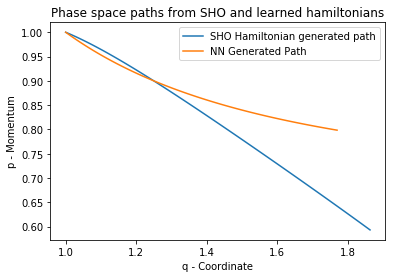

CurrentCost is: 28.73626280078889

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 28.32393899022709

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 27.92772900959613

Now Running Itteration 2 \ 5
the ImprovementItteration is: 3
CurrentCost is: 27.0708303399605

Now Running Itteration 3 \ 5
the ImprovementItteration is: 4
CurrentCost is: 26.218161156372542

Now Running Itteration 4 \ 5
the ImprovementItteration is: 5


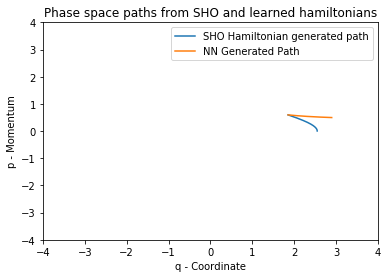

CurrentCost is: 36.24603569754562

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 35.84824449217899

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 35.520174214825275

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 35.18847793446776

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 34.844534708386405

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


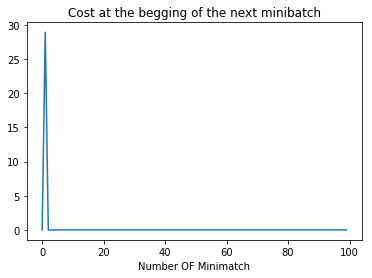

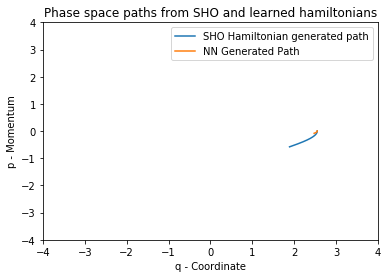

CurrentCost is: 1839.4072227853183

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 383.89847030264184

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 383.89847030264184

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 383.89847030264184

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 380.09274072690164

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


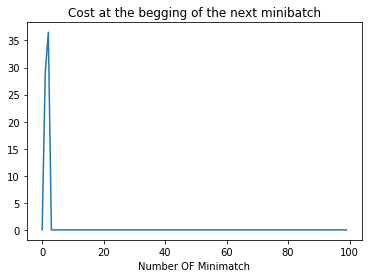

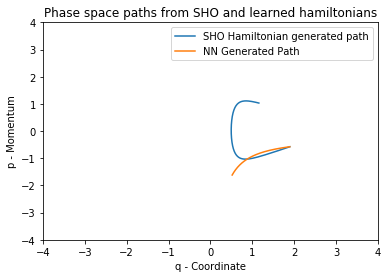

1
CurrentCost is: 22.038610412404296

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 21.282550373177415

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 19.97557831216724

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 17.939879538350453

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 16.31478099032843

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


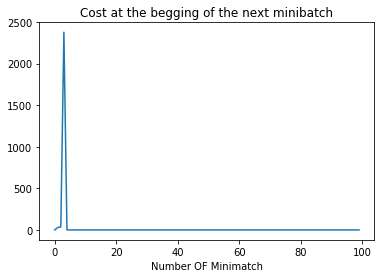

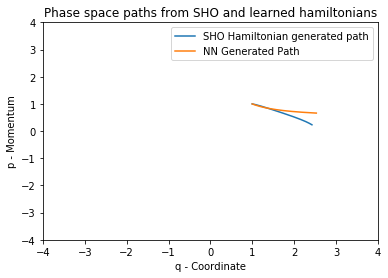

CurrentCost is: 23.26218974658045

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 22.92990484255281

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 22.743718760625782

Now Running Itteration 2 \ 5
the ImprovementItteration is: 3
CurrentCost is: 22.442755795378815

Now Running Itteration 3 \ 5
the ImprovementItteration is: 4
CurrentCost is: 22.28946466093472

Now Running Itteration 4 \ 5
the ImprovementItteration is: 5


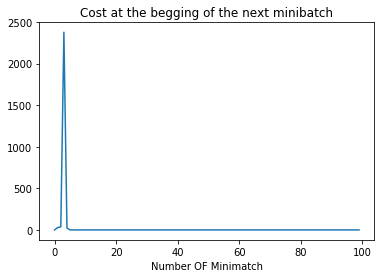

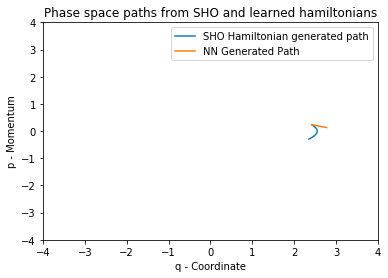

CurrentCost is: 64.23057394589269

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 62.835541712998065

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 61.92691732521394

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 60.8450215068341

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 60.3998402935966

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


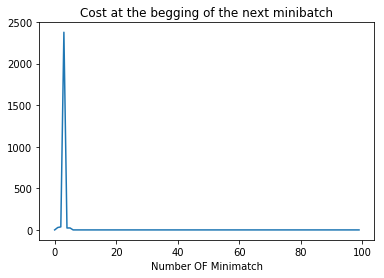

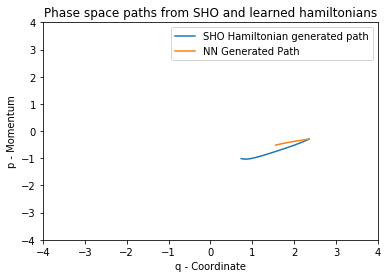

CurrentCost is: 10654.920817376915

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 10654.920817376915

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 10654.920817376915

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 10654.920817376915

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 10654.920817376915

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


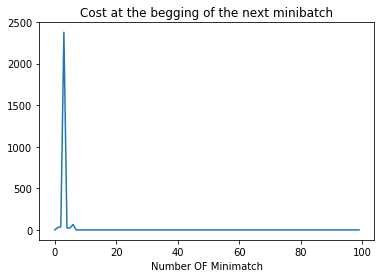

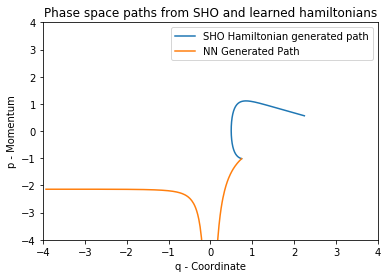

1
CurrentCost is: 12.41234348824928

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 12.073557555831318

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 11.425216243755276

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 10.687918469489922

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 9.446308768302448

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


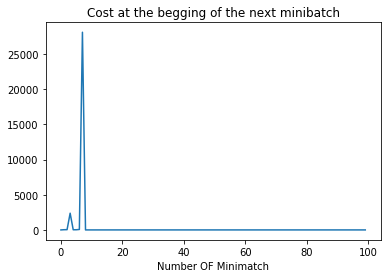

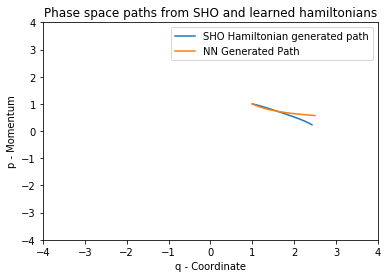

CurrentCost is: 21.798294615315736

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 21.28759094708311

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 21.06725299006277

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 20.676469668525755

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 20.390809809946983

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


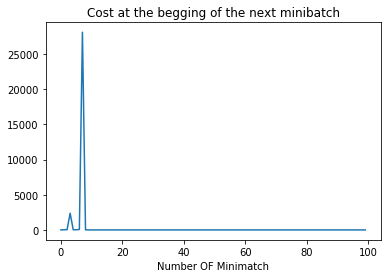

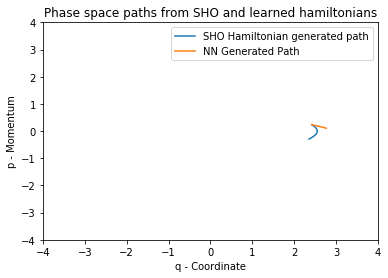

CurrentCost is: 52.49390312906635

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 50.8910278377299

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 49.89588092626092

Now Running Itteration 2 \ 5
the ImprovementItteration is: 3
CurrentCost is: 47.710631840435695

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 40.69956191705745

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


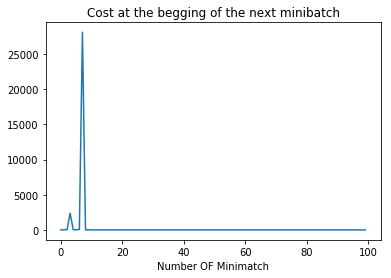

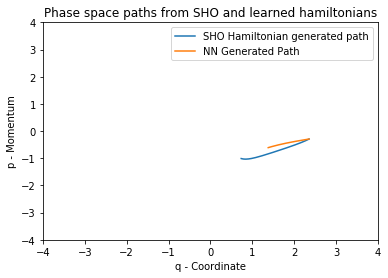

CurrentCost is: 28064.481696061033

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 213.96538789012493

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 210.78347443318054

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 210.78347443318054

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 199.5571176143024

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


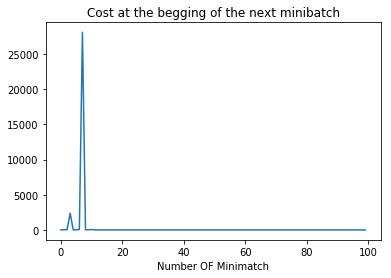

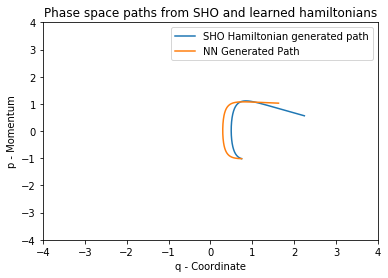

1
CurrentCost is: 47.937074772004756

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 40.905691146493204

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 32.54082226840495

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 32.35659921954143

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 31.751359507600437

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


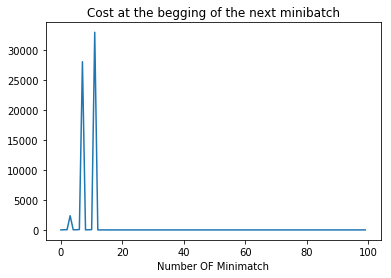

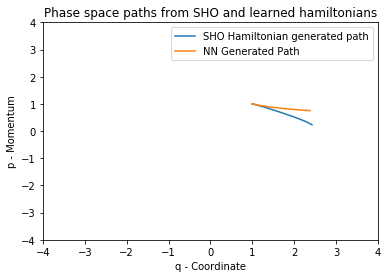

CurrentCost is: 19.8464289441501

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 19.669357434286848

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 19.554875708664156

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 19.36761356168964

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 19.15622089753382

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


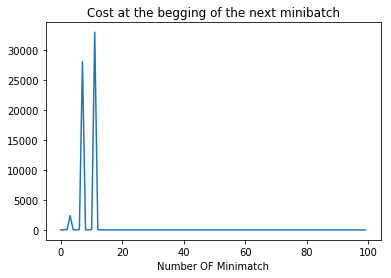

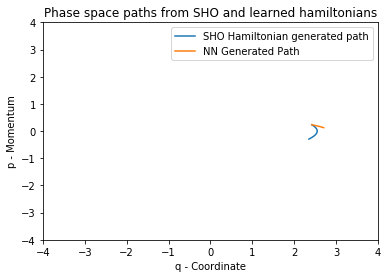

CurrentCost is: 86.35319640308244

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 82.49899661046375

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 62.00884286068498

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 62.00884286068498

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 61.03297660585182

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


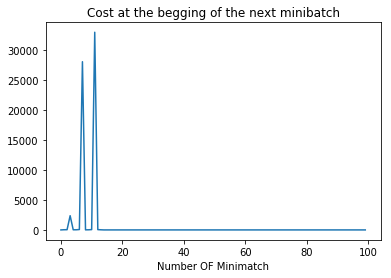

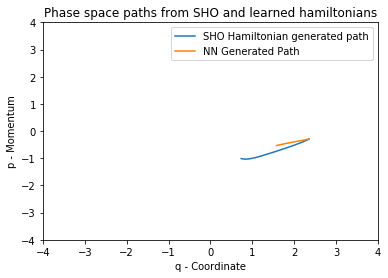

CurrentCost is: 19291.475915249935

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 874.3416062958106

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 113.96724295000092

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 113.73734766858647

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 113.58063401084335

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


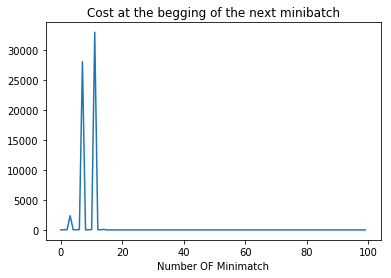

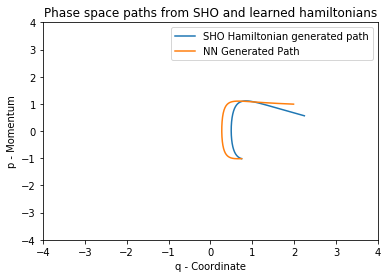

1
CurrentCost is: 55.25008207457977

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 47.38879800100174

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 26.845278291005556

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 26.631163687142237

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 25.232262879657565

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


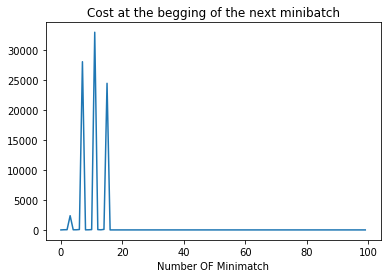

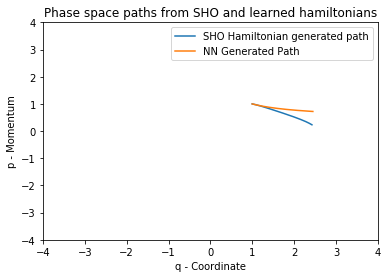

CurrentCost is: 20.24901355030814

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.005238489003638

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 19.606163891389517

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 19.42928364132332

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 19.04991584789617

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


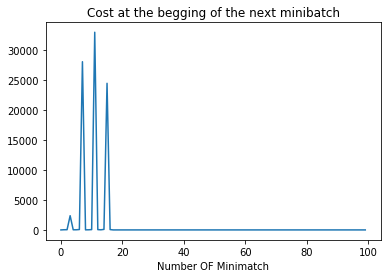

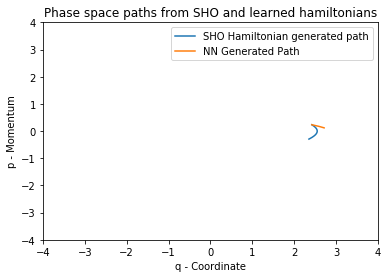

CurrentCost is: 79.26804994561472

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 78.70409832506435

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 78.538577861863

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 77.88059893023353

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 76.31864568583751

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


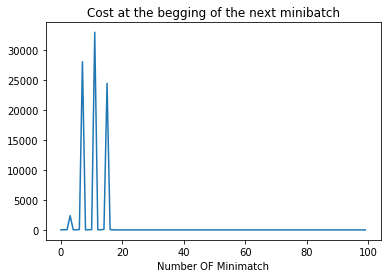

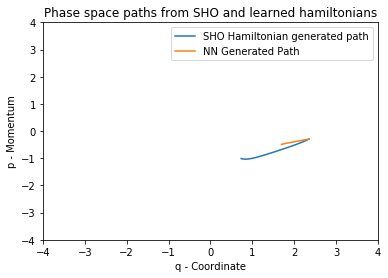

CurrentCost is: 19572.09165362566

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 9782.486743588339

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 4978.8493288704685

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 4978.8493288704685

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4978.8493288704685

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


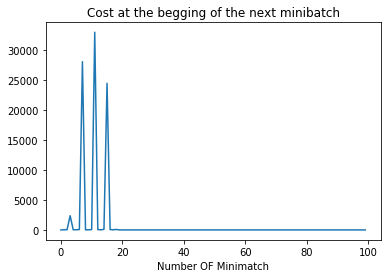

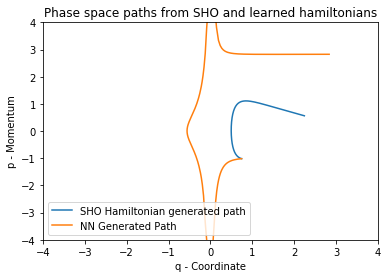

1
CurrentCost is: 214.02026881379732

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 151.8393993351913

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 104.95455672398283

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 104.95455672398283

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 100.53839056570114

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


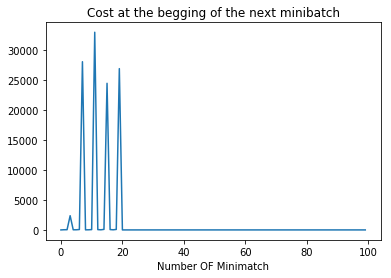

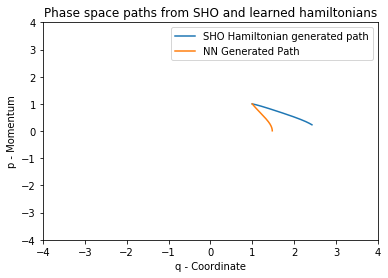

CurrentCost is: 13.860666002713957

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 13.772188172283638

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 13.528303986522332

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 13.399902615753303

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 13.227751315685259

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


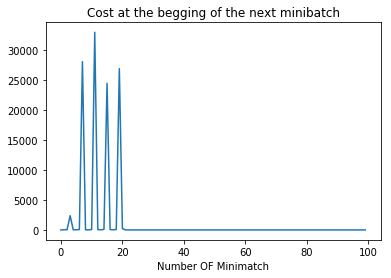

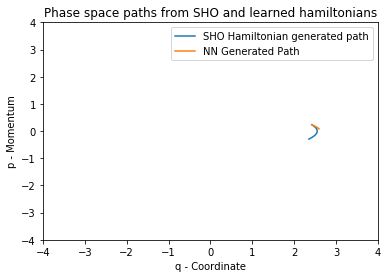

CurrentCost is: 100.53072108910071

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 97.38015085336028

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 85.57448641199993

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 8.157340312528001

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 8.157340312528001

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


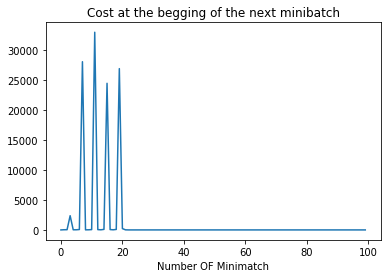

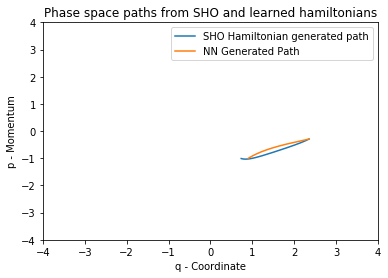

CurrentCost is: 21230.903142684252

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1125.1408538520639

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 1066.6195560990186

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 699.4415441880031

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 690.3424677996261

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


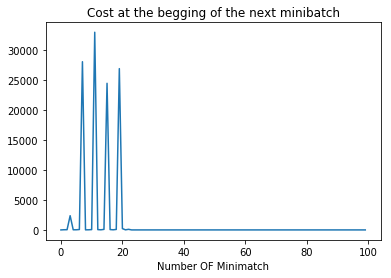

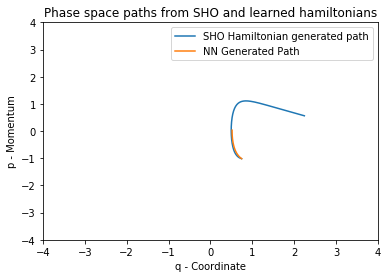

1
CurrentCost is: 204.4018754247602

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 197.50375149999329

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 151.13549061090407

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 32.12131011279891

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 13.898457624572561

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


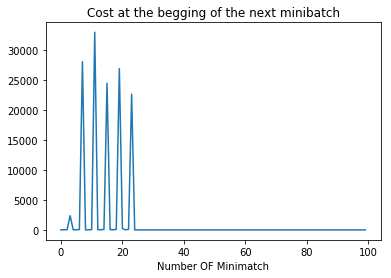

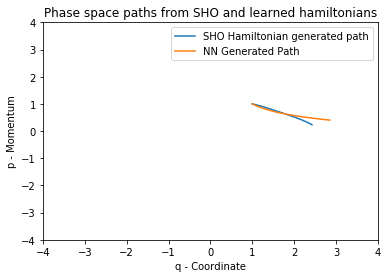

CurrentCost is: 16.379114514089114

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 15.877764674032884

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 15.531316214189038

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 15.116861260743645

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 14.654653614231616

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


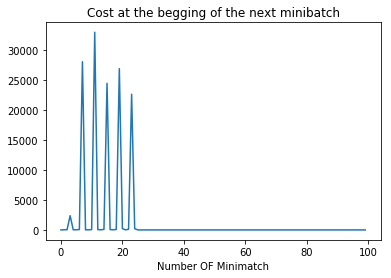

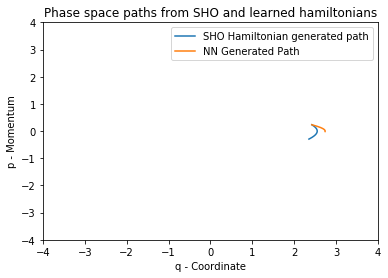

CurrentCost is: 10.51686601831359

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 8.351387399865748

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 7.794128280018575

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 7.212400004244868

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 6.359866987200127

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


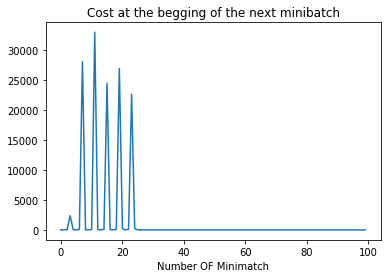

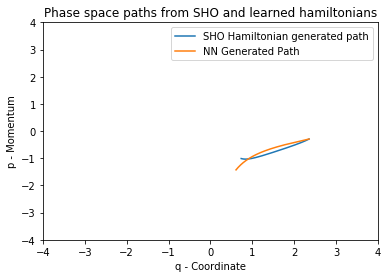

CurrentCost is: 44097.08619999212

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 495.5094586770556

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 488.216098861911

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 483.7815132187821

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 482.9895515174168

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


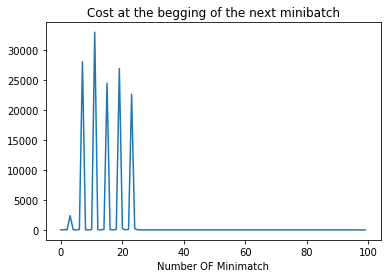

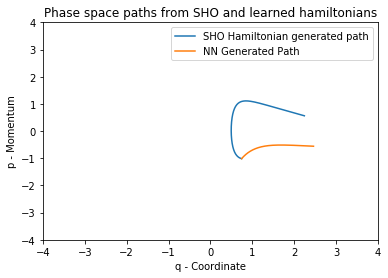

1
CurrentCost is: 23693.237732379337

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 17636.138256557933

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 15493.01765003809

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 546.0688749263454

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
Applied supression of change vector
CurrentCost is: 442.40178846340933

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


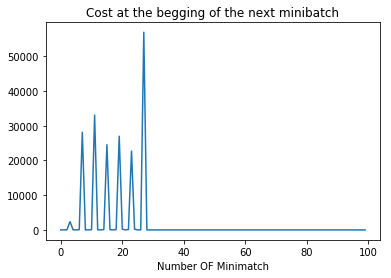

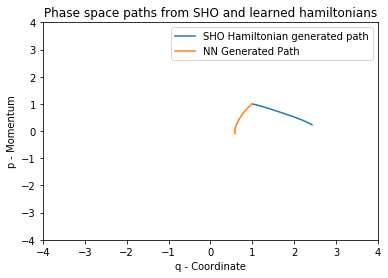

CurrentCost is: 6.209408564114209

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.1232209223539975

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.0967776531724445

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 6.055361471603433

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.025017012631104

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


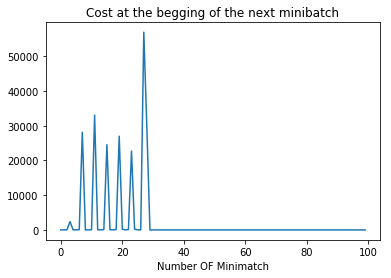

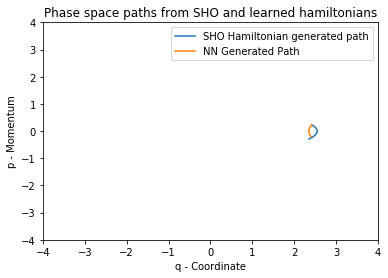

CurrentCost is: 301.8489527523962

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 284.82587219490915

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 87.36143886158689

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 87.36143886158689

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 86.38383962316409

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


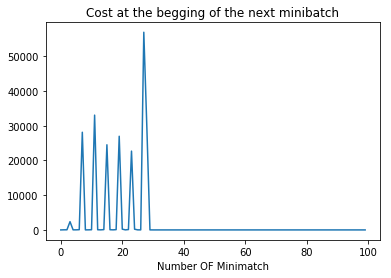

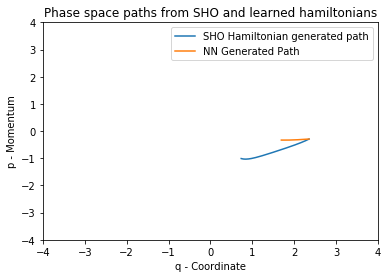

CurrentCost is: 68.86054354318603

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 68.02492711487031

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 66.22784061519377

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 64.95912052693706

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 62.93133037564143

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


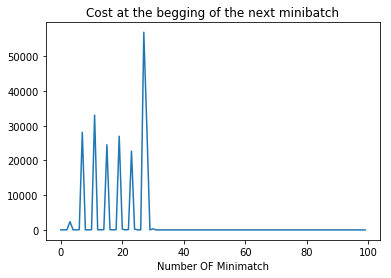

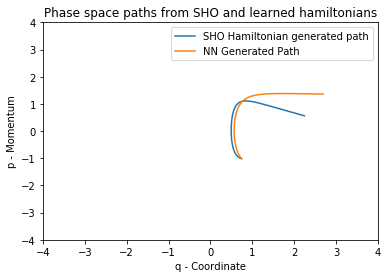

1
CurrentCost is: 107.62471908813555

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 88.82861484228314

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 77.6181126999315

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 76.51380806262809

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 75.1175596223213

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


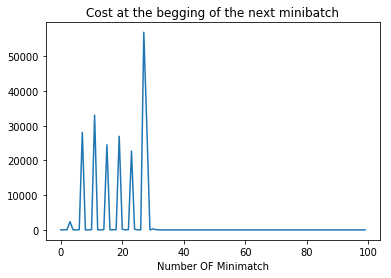

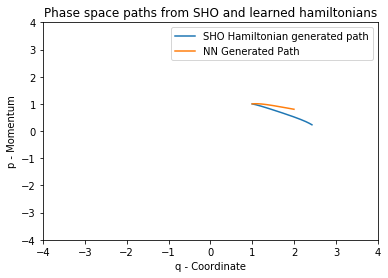

CurrentCost is: 10.842023632972232

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 10.619372977625456

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 10.450859814850102

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 10.391829916705587

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 10.225147622060302

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


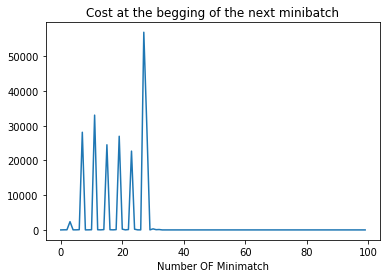

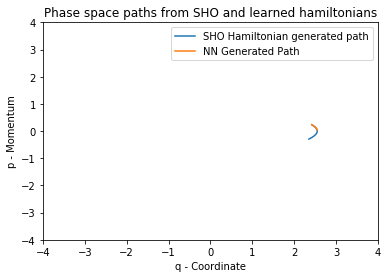

CurrentCost is: 107.29293435492995

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 103.73389117827462

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 88.85626115894081

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.700135958264389

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 5.265304800539584

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


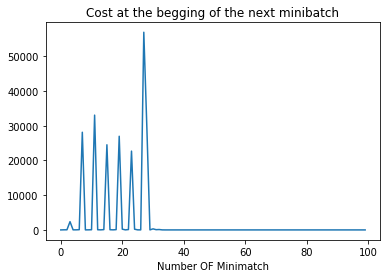

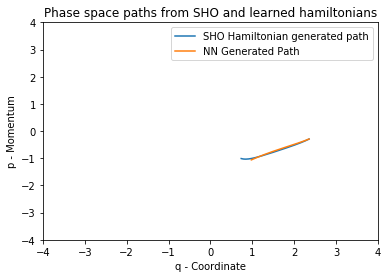

CurrentCost is: 89.93463059621011

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 49.16429306136015

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 49.16429306136015

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 47.73991185645281

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 47.73991185645281

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


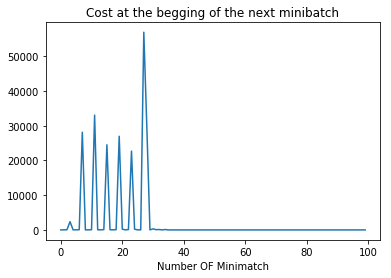

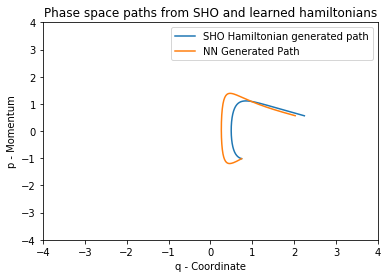

1
CurrentCost is: 2.1967494971173314

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.7059788481447609

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.3167628849195898

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.1340720567870108

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.808964851845781

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


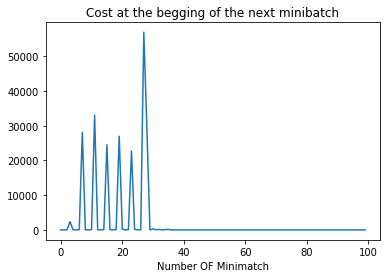

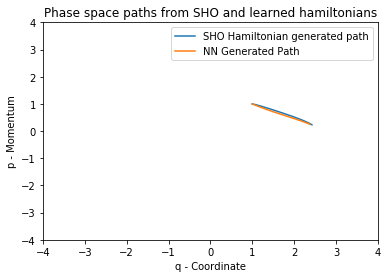

CurrentCost is: 2.888543527502759

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.7220929154652986

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.6634065856438656

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.617037033014129

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.451725848370646

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


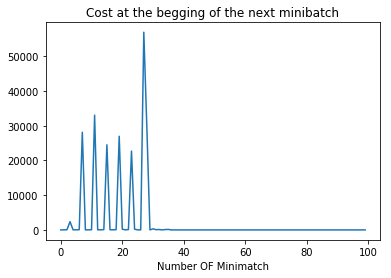

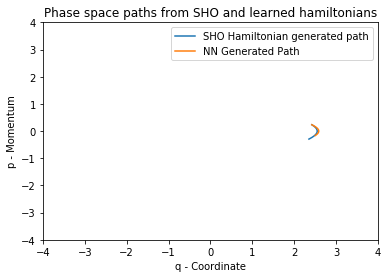

CurrentCost is: 2.1872231588756748

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.9046242437606802

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.8744383311291486

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.7683187587836853

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.6027123650220987

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


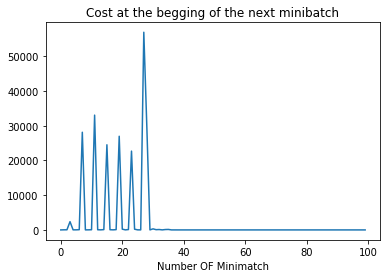

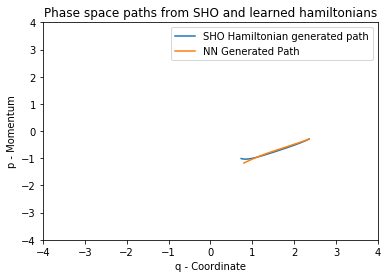

CurrentCost is: 61.71678521943939

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 53.716861153322

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 25.32044931063424

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 25.32044931063424

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 23.569923292490042

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


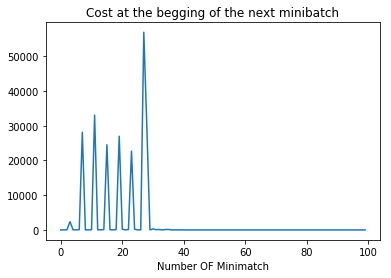

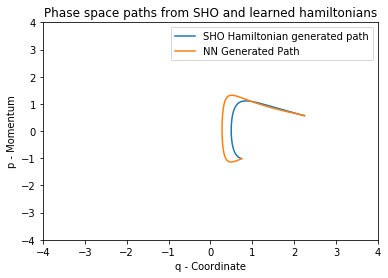

1
CurrentCost is: 0.6901150178355573

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.599160887642984

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.49343362887736186

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.4377300311381041

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.3779226637487615

Now Running Itteration 4 \ 5
the ImprovementItteration is: 4


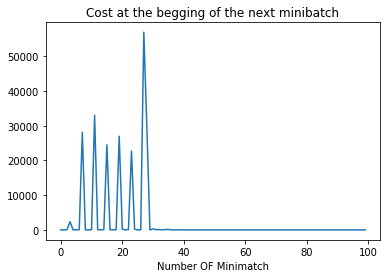

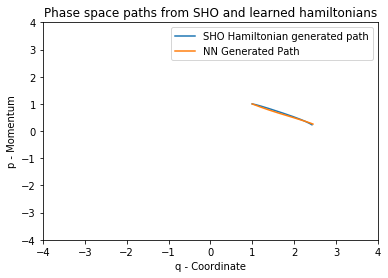

CurrentCost is: 2.57201488962556

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.492008466697145

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.366136336764673

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.2658772055651646

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.177599183267129

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


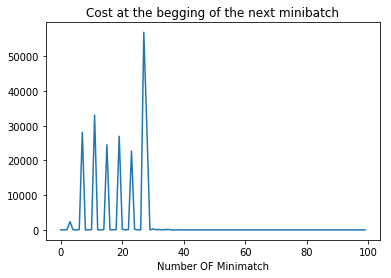

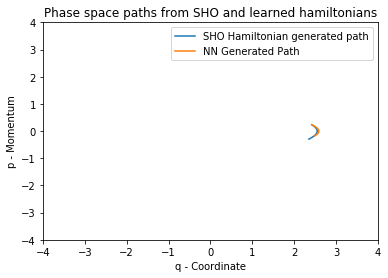

CurrentCost is: 1.1581497379141212

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.1312671749525547

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.098609706424945

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.0645418844867425

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.0645418844867425

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


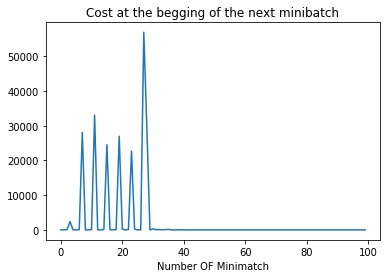

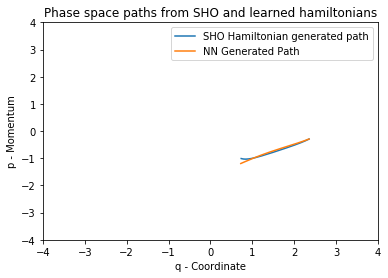

CurrentCost is: 41.0308298374131

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 33.177364660406994

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 17.597408843972314

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 17.597408843972314

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 16.860965278521398

Now Running Itteration 4 \ 5
the ImprovementItteration is: 3


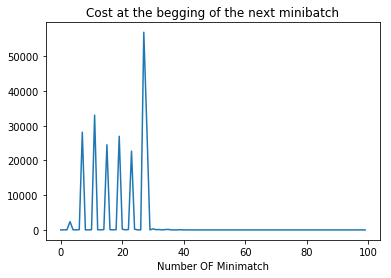

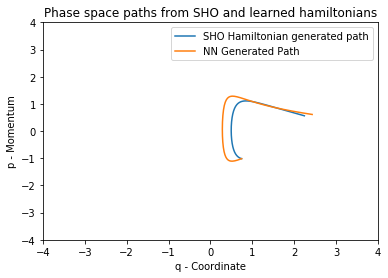

1
CurrentCost is: 6.403355030958279

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.494903433844967

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.925962362878323

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.7778259324492507

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.4176308272616895

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


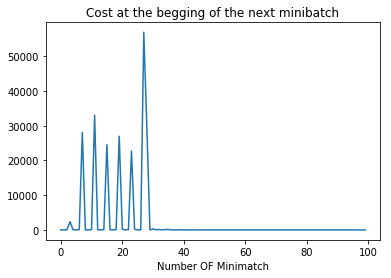

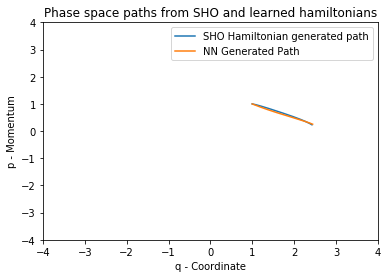

CurrentCost is: 2.607248123140623

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.5118194237414104

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.430859567395986

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.3318300663072415

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.27250803463938

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


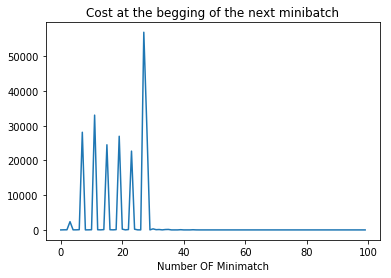

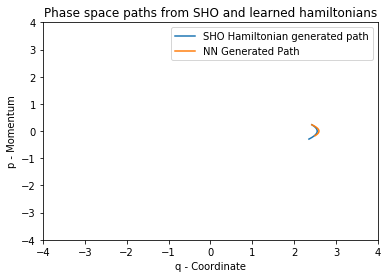

CurrentCost is: 1.1309465036424924

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.0943052004343865

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.0733323020939187

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.0733323020939187

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.0639384642472933

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


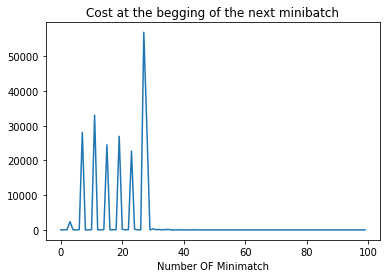

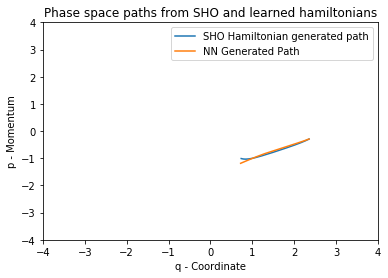

CurrentCost is: 34.64317223425138

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 31.288508946306873

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 29.842194665995237

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 27.789310856990344

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 27.789310856990344

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


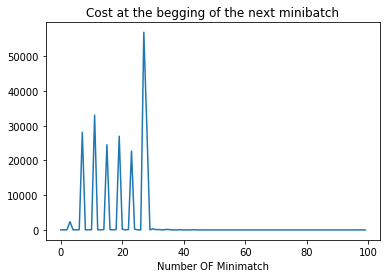

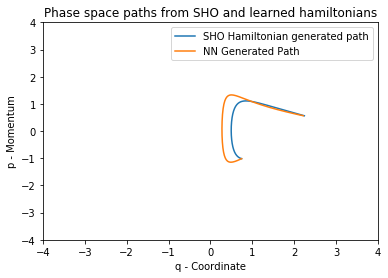

1
CurrentCost is: 0.4577830864984614

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.40287572874339633

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.3707705226071023

Now Running Itteration 2 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.33728344433715896

Now Running Itteration 3 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.3276559399541382

Now Running Itteration 4 \ 5
the ImprovementItteration is: 5


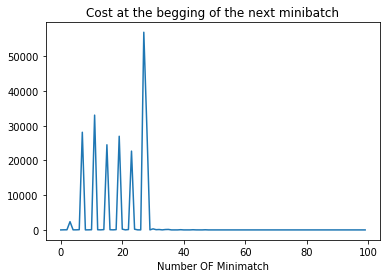

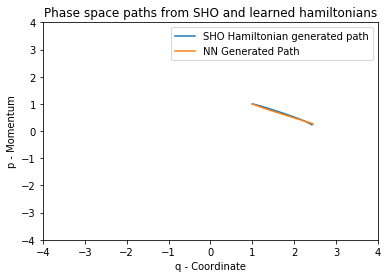

CurrentCost is: 2.6065219741823142

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.508427464913256

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.4134627156213546

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.2918460883375125

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.207919123182438

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


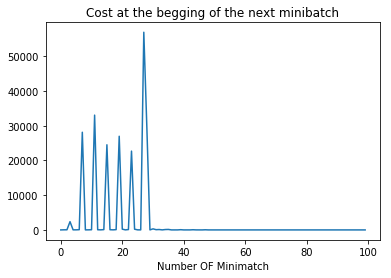

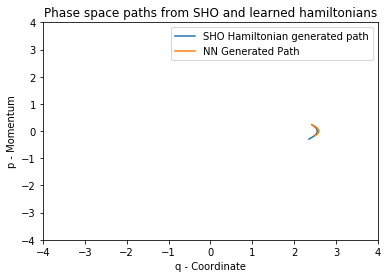

CurrentCost is: 1.0319245245259747

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.0301826567950265

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.0096578982202131

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.9974850291965985

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.9964982849503723

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


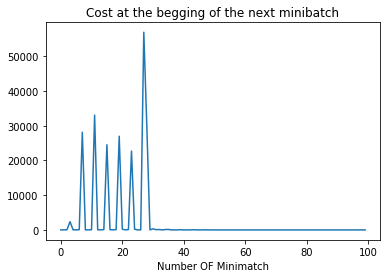

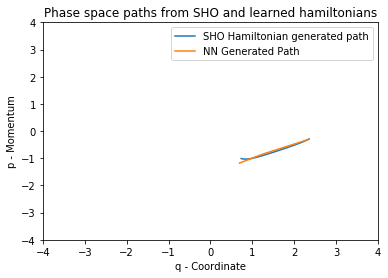

CurrentCost is: 30.540366912497355

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 28.194869650130276

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 27.743578007899107

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 24.233079703077152

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 15.58859648857658

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


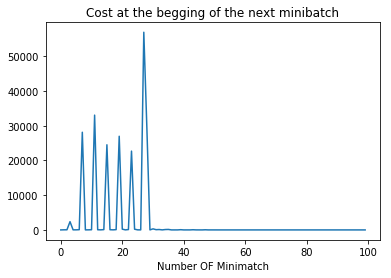

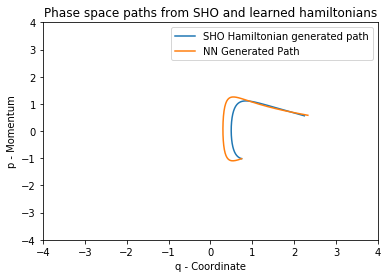

1
CurrentCost is: 4.262631352116285

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.6048716739481907

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.667058346499826

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.6887832894477561

Now Running Itteration 3 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.7878795543841203

Now Running Itteration 4 \ 5
the ImprovementItteration is: 2


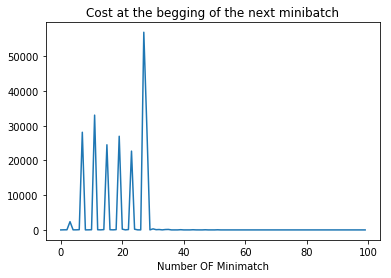

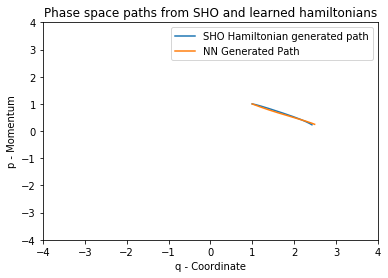

CurrentCost is: 2.2221233213023757

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.103864799760924

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.0060158719607735

Now Running Itteration 2 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.9462982671528621

Now Running Itteration 3 \ 5
the ImprovementItteration is: 3


KeyboardInterrupt: 

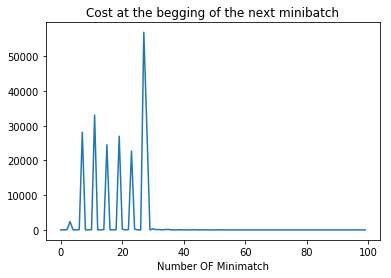

In [35]:
def Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted,Lambda,Current_Parameters):

    
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((p_true - p_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((p_true - p_predicted)/(dp_true - dp_predicted)))


    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor2*np.sum((dp_true - dp_predicted)**2)


    Loss =  Loss2 + Loss1 + Lambda*(np.sum(Current_Parameters**2))

    return Loss



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 
#         Lambda = 0.01
        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)

        for i in range (0,NumberOfSamples):
            q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path_From_Regression_Method(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
            Cost_Function1[i] = Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted,Lambda,Individuals_Parameter_Vector[:,i])


        return Cost_Function1
    

    
    
    

## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.01
TargetedMultiplicationFactor = 1.5
RandomMultiplicationFactor =  0.01
SignificantChangeValue =0.01
Maximal_Random_Search = 0.01
Lambda = 0.01
NumberOfSamples = 10
Number_Of_Itterations =50
print_Cost = 1


x = 1
y = 1
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])

InitialParameters = 0.01*np.random.rand(3,1)

T_total = 1.1
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)



# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path_From_Regression_Method(Best_Individual,First_two_phase_space_samples,T_total)
    

plt.figure(0)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.show()

Number_Of_Minibatches = 100
Cost_Tracking_Vector = np.zeros(Number_Of_Minibatches)
for i in range (1,Number_Of_Minibatches):
    Number_Of_Itterations =5
    T_total = 2.5
    
    
    N = q_true.shape[0]
    First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
    
    if np.mod(i,4) == 0:
        print(1)
        First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
        
    q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
    
    Cost_Tracking_Vector[i]    = Cost1.Cost_Function(Best_Individual)

    Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)
#     q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

    q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path_From_Regression_Method(Best_Individual,First_two_phase_space_samples,T_total)
    
    plt.figure(4)
    plt.plot(q_true,p_true)
    plt.plot(q_predicted,p_predicted)
    plt.title("Phase space paths from SHO and learned hamiltonians")
    plt.xlabel("q - Coordinate")
    plt.ylabel("p - Momentum")
    plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()

    
    plt.figure(5)
    plt.title("Cost at the begging of the next minibatch")
    plt.plot(Cost_Tracking_Vector)
    plt.xlabel("Cost")
    plt.xlabel("Number OF Minimatch")


In [33]:
print(Best_Individual.shape)
Save_to_CSV_For_Regressions(Best_Individual)

(3, 1)


<function Open_Parameters_For_Regression at 0x0000029F75167BF8>


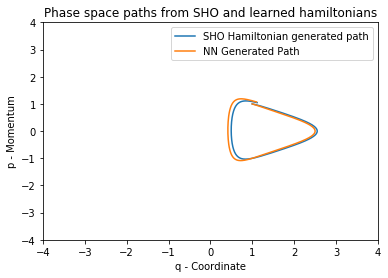

CurrentCost is: 4.326037693399115

Now Running Itteration 0 \ 10
the ImprovementItteration is: 2
CurrentCost is: 4.326037693399115

Now Running Itteration 1 \ 10
the ImprovementItteration is: 3
CurrentCost is: 4.326037693399115

Now Running Itteration 2 \ 10
the ImprovementItteration is: 4
CurrentCost is: 4.326037693399115

Now Running Itteration 3 \ 10
the ImprovementItteration is: 5
CurrentCost is: 4.326037693399115

Now Running Itteration 4 \ 10
the ImprovementItteration is: 6
CurrentCost is: 4.326037693399115

Now Running Itteration 5 \ 10
the ImprovementItteration is: 7
CurrentCost is: 4.326037693399115

Now Running Itteration 6 \ 10
the ImprovementItteration is: 8
CurrentCost is: 4.304292310611527

Now Running Itteration 7 \ 10
the ImprovementItteration is: 9
CurrentCost is: 4.304292310611527

Now Running Itteration 8 \ 10
the ImprovementItteration is: 10
CurrentCost is: 4.304292310611527

Now Running Itteration 9 \ 10
the ImprovementItteration is: 11


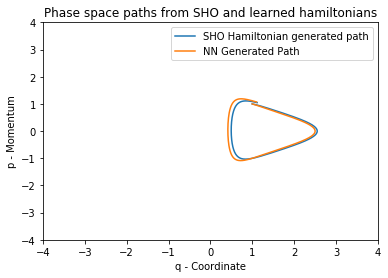

In [87]:
# Best_Individual1 = Open_Parameters_For_Regression()
# Best_Individual = Best_Individual1
print(Open_Parameters_For_Regression)
T_total = 8.5
    
## Testing network on longer data
N = q_true.shape[0]
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path_From_Regression_Method(Best_Individual,First_two_phase_space_samples,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =0.005
Maximal_Random_Search = 0.01
NumberOfSamples = 10 ## This is the number of individuals in each itteration



Number_Of_Itterations =10
  
N = q_true.shape[0]
# First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.99679738],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path_From_Regression_Method(Best_Individual,First_two_phase_space_samples,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




# Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [88]:
Hamiltonian_Relative_Error = np.sqrt((1/N)*np.sum((((p_true-p_predicted))**2 + ((q_true-q_predicted)**2 ))/(q_true**2 + p_true**2)))
print("The Hamiltonian Relative Error",Hamiltonian_Relative_Error)

The Hamiltonian Relative Error 0.04962008652550682


In [27]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

NameError: name 'TotalParameters_in_5_layer_net' is not defined

In [25]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project\Central Force" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [26]:
Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

NameError: name 'TotalParameters_in_5_layer_net' is not defined

In [303]:
def Open_Parameters_For_Regression():
    Best_Individual1 = Load_Parameters_For_Regressions()

    Temp = np.concatenate([Best_Individual1[:,0]],axis = 0)

    Best_Individual1 = np.array([Temp]).T



    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1

Best_Individual1 = Open_Parameters_For_Regression()
Best_Individual = Best_Individual1
print(Best_Individual.shape)



(3, 1)


In [260]:
def Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    
    
    
def Create_predicted_path2(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [261]:
q_true, p_true
N = q_true.shape[0]
print(N)
print(q_true[N-2],q_true[N-1])

100
-1.8227262218393177 -1.8088382485905183


(array([-2.15811612, -2.16194416, -2.16606121, -2.17017826, -2.17429531,
        -2.17841236, -2.18252941, -2.18664646, -2.19076351, -2.19488056,
        -2.19899762, -2.20311467, -2.20723172, -2.21134877, -2.21546582,
        -2.21958287, -2.22369992, -2.22781697, -2.23193402, -2.23605107,
        -2.24016813, -2.24428518, -2.24840223, -2.25251928, -2.25663633,
        -2.26075338, -2.26487043, -2.26898748, -2.27310453, -2.27722159,
        -2.28133864, -2.28545569, -2.28957274, -2.29368979, -2.29780684,
        -2.30192389, -2.30604094, -2.31015799, -2.31427504, -2.3183921 ,
        -2.32250915, -2.3266262 , -2.33074325, -2.3348603 , -2.33897735,
        -2.3430944 , -2.34721145, -2.3513285 , -2.35544556, -2.35956261,
        -2.36367966, -2.36779671, -2.37191376, -2.37603081, -2.38014786,
        -2.38426491, -2.38838196, -2.39249901, -2.39661607, -2.40073312,
        -2.40485017, -2.40896722, -2.41308427, -2.41720132, -2.42131837,
        -2.42543542, -2.42955247, -2.43366953, -2.4

In [305]:
print(int(1.3))

1
